In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
%matplotlib inline

In [11]:
import matplotlib
from matplotlib import font_manager, rc

font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

In [12]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  C:\Users\PC\Anaconda3\lib\site-packages
classpath:  C:\Users\PC\Anaconda3\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [4]:
os.chdir('./data/')
os.listdir()

['data_schema_vf.xlsx',
 'desktop.ini',
 'news_test.csv',
 'news_train.csv',
 'sample_submission.csv']

In [5]:
data = pd.read_csv('news_train.csv')
data.head()

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0


In [6]:
data.shape

(118745, 6)

### <가짜 정보 "키워드">

1. 진짜 뉴스(info : 0)인 것과 가짜 뉴스(info : 1)인 것만 따로 나눠서 <strong>가장 많이 등장하는 단어</strong>는 무엇인지, <strong>가장 적게 등장하는 단어</strong>는 무엇인지 빈도 분석

In [13]:
real = data.loc[data['info'] == 0]
fake = data.loc[data['info'] == 1]

real

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0
5,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",[이데일리 권오석 기자] 중소벤처기업부(이하 중기부)는 대한민국 동행세일에 7개 T...,2,0
6,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","대한민국 동행세일은 라이브 커머스, 언택트 콘서트, O2O 행사 연계 등 비대면이라...",3,0
...,...,...,...,...,...,...
118696,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정","양수금액은 89억4565만원이며 이는 총자산대비 11.54%, 자기자본대비 13.8...",4,0
118719,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",[헤럴드경제=증권부] 모나리자는 사업다각화를 위해 위생용품 제조판매업체인 중원 주식...,27,0
118720,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",[헤럴드경제=증권부] 모나리자는 사업다각화를 위해 위생용품 제조판매업체인 중원 주식...,28,0
118721,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정","양수금액은 89억4565만원이며 이는 총자산대비 11.54%, 자기자본대비 13.8...",29,0


### 진짜 뉴스

###### - 우선, title에서 가장 많이 등장하는 단어

In [88]:
real_title = real['title'].drop_duplicates().values
print(len(real_title))
real_title

3624


array(['[마감]코스닥 기관 678억 순매도', '롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참',
       "13년만에 늦깎이 개발 '양주 회천' 봄볕 드나", ..., '에몬스가구, 신제품 라인업으로 코로나19 불황 뚫는다',
       '北, 여전히 “코로나19 감염 없다…기적 같은 현실”', '모나리자, 중원 지분 16.88% 양수 결정'],
      dtype=object)

In [89]:
# 형태소 분석된 문장 샘플 보기. eomi=True 옵션 사용 (eomi=True를 추가하지 않으면, 보-, 어리- 형태로 나오므로 해석이 안되기 때문)
sample_data = rhinoMorph.onlyMorph_list(rn, real_title[0], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('sample data: ',sample_data)   # 형태소 분석 결과
print('joined sample data: ', ' '.join(sample_data))    # 문자열을 공백(띄어쓰기)으로 연결한다

sample data:  ['마감', '코스닥', '기관', '순매도']
joined sample data:  마감 코스닥 기관 순매도


In [90]:
morphed_data = ''
for each in real_title:
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, each, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    joined_data_each = ' '.join(morphed_data_each)     # 문자열을 하나로 연결
    if joined_data_each:                               # 내용이 있는 경우만 저장
        morphed_data += joined_data_each + " "

In [91]:
morphed_data[:100]

'마감 코스닥 기관 순매도 롯데 공영 TV 홈쇼핑 동행 세일 동참 늦깎이 개발 양주 회 천 봄볕 드나다 코리아 온라인 한정판 퍼스트 에디션 출시 온라인 코로나 사태 최대 수혜 거래소'

In [92]:
from collections import Counter

print('morphed_data의 일부:', morphed_data[:200])

mergedTextList = morphed_data.split(' ')   # 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만듦
print('\nmergedTextList의 일부:', mergedTextList[:20])

wordInfo = Counter(mergedTextList)    # 하나의 리스트로 묶인 분리된 요소들을 카운트 (내림차순)
print('\nwordInfo:', wordInfo)        # 그냥 wordInfo라고 할 땐 내림차순 안되지만, print(wordInfo)로 하면 내림차순이 됨

morphed_data의 일부: 마감 코스닥 기관 순매도 롯데 공영 TV 홈쇼핑 동행 세일 동참 늦깎이 개발 양주 회 천 봄볕 드나다 코리아 온라인 한정판 퍼스트 에디션 출시 온라인 코로나 사태 최대 수혜 거래소 이에 실질 심사 대상 결정 조사 기간 연장 백화점 역설 코로나 전남도 민 소비 늘리다 전 향후 전망 종목 건설 단체 총 연합회 건설 진흥 법 개정안 철회 탄원서 제출 수익 정보 

mergedTextList의 일부: ['마감', '코스닥', '기관', '순매도', '롯데', '공영', 'TV', '홈쇼핑', '동행', '세일', '동참', '늦깎이', '개발', '양주', '회', '천', '봄볕', '드나다', '코리아', '온라인']

wordInfo: Counter({'코로나': 397, '상승': 249, '하다': 193, '주다': 159, '매수': 147, '상승세': 142, '이상': 142, '확진': 112, '주식': 103, '주가': 100, '종목': 96, '순': 96, '속보': 90, '되다': 89, '소폭': 89, '주': 87, '외국인': 87, '투자': 83, '지원': 79, '수': 75, '기업': 73, '전일': 71, '증권': 69, '위': 68, '한국': 67, '종합': 67, '상': 65, '금융': 63, '단기': 61, '규모': 60, '기관': 59, '코스피': 59, '분기': 59, '하락': 58, '코스닥': 57, '대비': 57, '출시': 56, '급등': 56, '연속': 55, '소유': 55, '확대': 54, '중기': 54, '신고': 54, '최대': 53, '서울': 52, '주주': 52, '증시': 52, '대량': 52, '추가': 51, 'SK': 50, '마감': 49, '정부': 49, '변동': 49, '결정': 48, '시장': 48, '첫': 48, '장': 47, '국내': 46, '더': 46, '없다': 46, '개발': 4

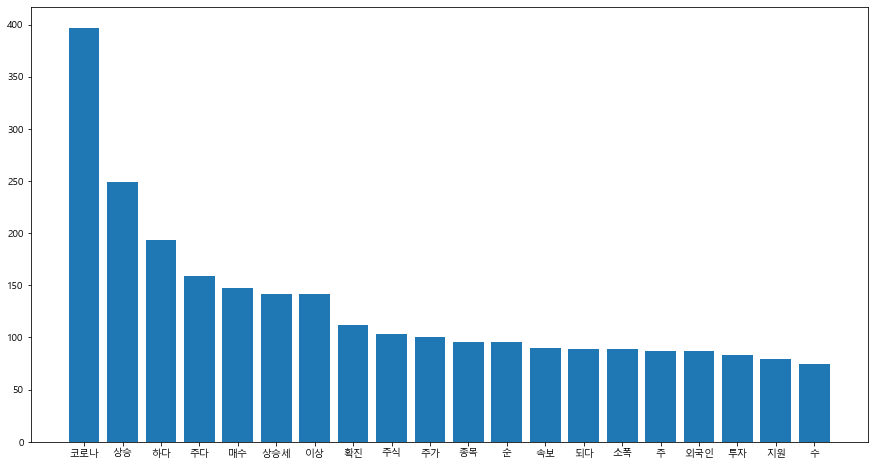

In [93]:
# 앞에서 20개까지만 출력
sorted_keys = sorted(wordInfo, key = wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)
%matplotlib inline
plt.figure(figsize=(15,8))
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

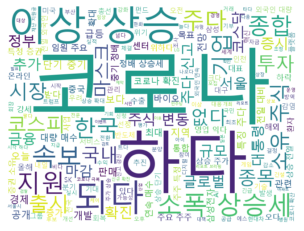

In [94]:
cloud = WordCloud(font_path = font_path, width = 800, height = 600, background_color = 'white').generate(morphed_data)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

###### - 그 다음, content에서 가장 많이 등장하는 단어

In [95]:
real_content = real['content'].drop_duplicates().values
print(len(real_content))
real_content

40370


array(['[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도',
       '종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지', '전국적인 소비 붐 조성에 기여할 예정', ...,
       '미군 고위인사가 북한 내 코로나19 발병에 대해 언급한 것은 처음있는 일이었다',
       '[헤럴드경제=증권부] 모나리자는 사업다각화를 위해 위생용품 제조판매업체인 중원 주식 1만5676주(16.88%)를 양수하기로 결정했다고 17일 공시했다',
       '양수금액은 89억4565만원이며 이는 총자산대비 11.54%, 자기자본대비 13.87%에 해당하는 규모이다'],
      dtype=object)

In [96]:
# 형태소 분석된 문장 샘플 보기. eomi=True 옵션 사용 (eomi=True를 추가하지 않으면, 보-, 어리- 형태로 나오므로 해석이 안되기 때문)
sample_data = rhinoMorph.onlyMorph_list(rn, real_content[0], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('sample data: ',sample_data)   # 형태소 분석 결과
print('joined sample data: ', ' '.join(sample_data))    # 문자열을 공백(띄어쓰기)으로 연결한다

sample data:  ['이데일리', '현재', '코스닥', '기관', '순매도']
joined sample data:  이데일리 현재 코스닥 기관 순매도


In [97]:
morphed_data = ''
for each in real_content:
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, each, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    joined_data_each = ' '.join(morphed_data_each)     # 문자열을 하나로 연결
    if joined_data_each:                               # 내용이 있는 경우만 저장
        morphed_data += joined_data_each + " "

In [98]:
morphed_data[:100]

'이데일리 현재 코스닥 기관 순매도 종합 경제 정보 미디어 이데일리 무단 전재 배포 금지 전국적 소비 붐 조성 기여 예정 이데일리 권 오석 기자 중소 벤처기업 부 이하 중기 부 대한'

In [99]:
from collections import Counter

print('morphed_data의 일부:', morphed_data[:200])

mergedTextList = morphed_data.split(' ')   # 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만듦
print('\nmergedTextList의 일부:', mergedTextList[:20])

wordInfo = Counter(mergedTextList)    # 하나의 리스트로 묶인 분리된 요소들을 카운트 (내림차순)
print('\nwordInfo:', wordInfo)        # 그냥 wordInfo라고 할 땐 내림차순 안되지만, print(wordInfo)로 하면 내림차순이 됨

morphed_data의 일부: 이데일리 현재 코스닥 기관 순매도 종합 경제 정보 미디어 이데일리 무단 전재 배포 금지 전국적 소비 붐 조성 기여 예정 이데일리 권 오석 기자 중소 벤처기업 부 이하 중기 부 대한민국 동행 세일 TV 홈쇼핑 사가 홍보 판매 동참 밝히다 대한민국 동행 세일 라이브 커머스 언 택 트다 콘서트 행사 연계 대면 새롭다 형태 소비 촉진 행사 권역 현장 행사 온 오프

mergedTextList의 일부: ['이데일리', '현재', '코스닥', '기관', '순매도', '종합', '경제', '정보', '미디어', '이데일리', '무단', '전재', '배포', '금지', '전국적', '소비', '붐', '조성', '기여', '예정']

wordInfo: Counter({'하다': 12812, '되다': 11323, '있다': 8386, '코로나': 3955, '위하다': 2797, '대하다': 2511, '이': 2298, '따르다': 2094, '받다': 1916, '기자': 1904, '밝히다': 1891, '통하다': 1864, '및': 1733, '시장': 1600, '경제': 1566, '기업': 1515, '투자': 1502, '지나다': 1492, '지원': 1474, '말하다': 1446, '대비': 1374, '사업': 1364, '없다': 1303, '최근': 1248, '전': 1248, '미국': 1237, '지역': 1235, '이번': 1206, '서울': 1203, '현재': 1200, '관련': 1198, '기준': 1168, '정부': 1165, '크다': 1118, '오다': 1078, '중국': 1054, '국내': 1044, '보이다': 1031, '진행': 1026, '금융': 1025, '올해': 998, '등': 996, '상승': 996, '지난해': 994, '이날': 991, '계획': 980, '한국': 978, '이후': 958, '개발': 953, '높다': 953, '확진': 951, '더'

In [100]:
len(wordInfo)

29277

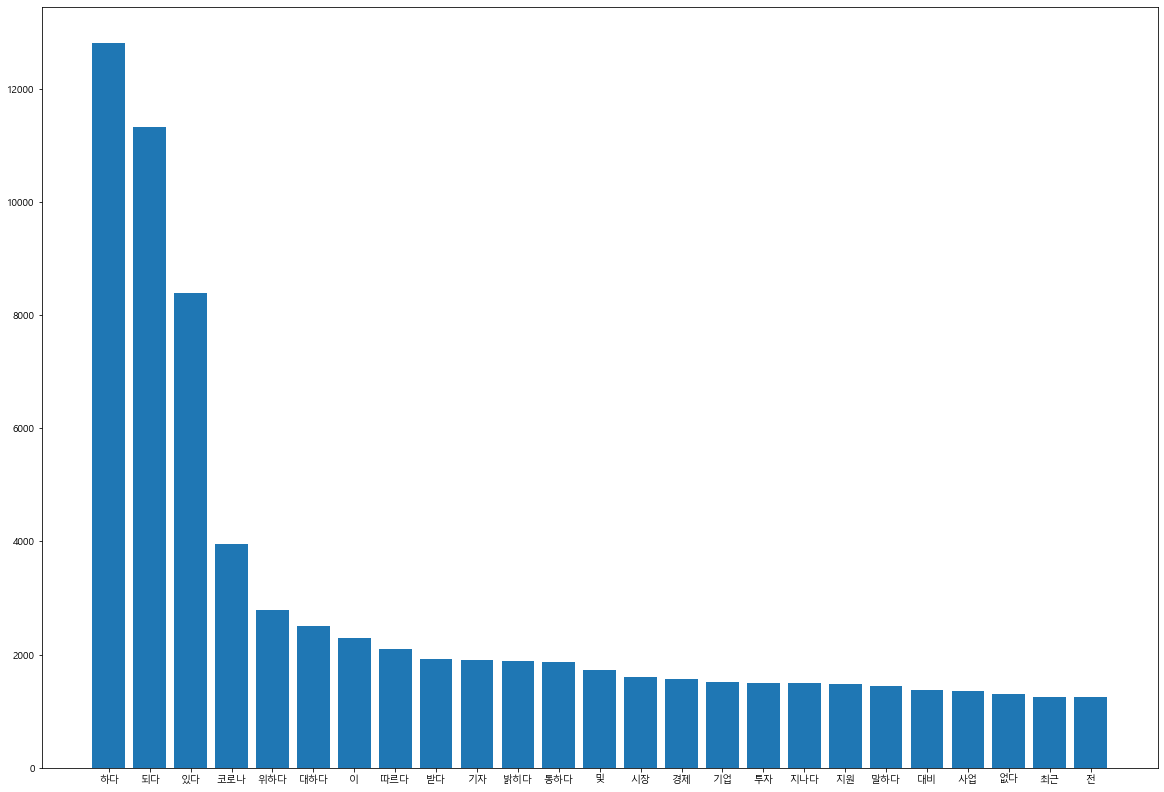

In [101]:
# 25개만 출력
sorted_keys = sorted(wordInfo, key = wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)
%matplotlib inline
plt.figure(figsize=(20,14))
plt.bar(range(25), sorted_values[:25])
plt.xticks(range(25), sorted_keys[:25])
plt.show()

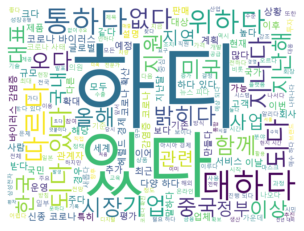

In [102]:
cloud = WordCloud(font_path = font_path, width = 800, height = 600, background_color = 'white').generate(morphed_data)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 가짜 뉴스

###### - 우선, title에서 가장 많이 등장하는 단어

In [46]:
fake

,n_id,date,title,content,ord,info
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
16,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",13,1
17,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",14,1
42,NEWS07691,20200518,13년만에 늦깎이 개발 '양주 회천' 봄볕 드나,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",24,1
...,...,...,...,...,...,...
118740,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",미 FDA 임상3상 허가 임박. 묻고 따블로 갈 바이오 황제주.,48,1
118741,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,49,1
118742,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,50,1
118743,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",2020년 한국 TV 2대중 1대 인터넷 연결된다,51,1


In [103]:
fake_title = fake['title'].drop_duplicates().values
print(len(fake_title))
fake_title

3399


array(['[마감]코스닥 기관 678억 순매도', '롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참',
       "13년만에 늦깎이 개발 '양주 회천' 봄볕 드나", ..., '에몬스가구, 신제품 라인업으로 코로나19 불황 뚫는다',
       '北, 여전히 “코로나19 감염 없다…기적 같은 현실”', '모나리자, 중원 지분 16.88% 양수 결정'],
      dtype=object)

In [104]:
# 형태소 분석된 문장 샘플 보기. eomi=True 옵션 사용 (eomi=True를 추가하지 않으면, 보-, 어리- 형태로 나오므로 해석이 안되기 때문)
sample_data = rhinoMorph.onlyMorph_list(rn, fake_title[0], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('sample data: ',sample_data)   # 형태소 분석 결과
print('joined sample data: ', ' '.join(sample_data))    # 문자열을 공백(띄어쓰기)으로 연결한다

sample data:  ['마감', '코스닥', '기관', '순매도']
joined sample data:  마감 코스닥 기관 순매도


In [105]:
morphed_data = ''
for each in fake_title:
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, each, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    joined_data_each = ' '.join(morphed_data_each)     # 문자열을 하나로 연결
    if joined_data_each:                               # 내용이 있는 경우만 저장
        morphed_data += joined_data_each + " "

In [106]:
morphed_data[:100]

'마감 코스닥 기관 순매도 롯데 공영 TV 홈쇼핑 동행 세일 동참 늦깎이 개발 양주 회 천 봄볕 드나다 코리아 온라인 한정판 퍼스트 에디션 출시 온라인 코로나 사태 최대 수혜 거래소'

In [107]:
from collections import Counter

print('morphed_data의 일부:', morphed_data[:200])

mergedTextList = morphed_data.split(' ')   # 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만듦
print('\nmergedTextList의 일부:', mergedTextList[:20])

wordInfo = Counter(mergedTextList)    # 하나의 리스트로 묶인 분리된 요소들을 카운트 (내림차순)
print('\nwordInfo:', wordInfo)        # 그냥 wordInfo라고 할 땐 내림차순 안되지만, print(wordInfo)로 하면 내림차순이 됨

morphed_data의 일부: 마감 코스닥 기관 순매도 롯데 공영 TV 홈쇼핑 동행 세일 동참 늦깎이 개발 양주 회 천 봄볕 드나다 코리아 온라인 한정판 퍼스트 에디션 출시 온라인 코로나 사태 최대 수혜 거래소 이에 실질 심사 대상 결정 조사 기간 연장 백화점 역설 코로나 전남도 민 소비 늘리다 전 향후 전망 종목 건설 단체 총 연합회 건설 진흥 법 개정안 철회 탄원서 제출 수익 정보 

mergedTextList의 일부: ['마감', '코스닥', '기관', '순매도', '롯데', '공영', 'TV', '홈쇼핑', '동행', '세일', '동참', '늦깎이', '개발', '양주', '회', '천', '봄볕', '드나다', '코리아', '온라인']

wordInfo: Counter({'코로나': 368, '상승': 242, '하다': 170, '주다': 149, '매수': 146, '상승세': 141, '이상': 140, '확진': 101, '주가': 97, '순': 96, '주식': 95, '소폭': 88, '외국인': 87, '종목': 85, '속보': 85, '주': 84, '되다': 80, '투자': 78, '지원': 74, '수': 73, '전일': 71, '기업': 68, '증권': 68, '위': 67, '한국': 65, '상': 62, '단기': 61, '기관': 59, '규모': 59, '금융': 58, '코스닥': 57, '분기': 57, '출시': 56, '하락': 56, '대비': 56, '소유': 55, '연속': 54, '중기': 54, '코스피': 53, '신고': 53, '최대': 52, '확대': 52, '주주': 52, '대량': 51, 'SK': 49, '변동': 49, '결정': 47, '급등': 47, '정부': 47, '추가': 47, '서울': 46, '종합': 46, '마감': 44, '시장': 44, '국내': 44, '더': 44, '증시': 44, '마스크': 43, '출발': 42, '첫': 42, '영업': 4

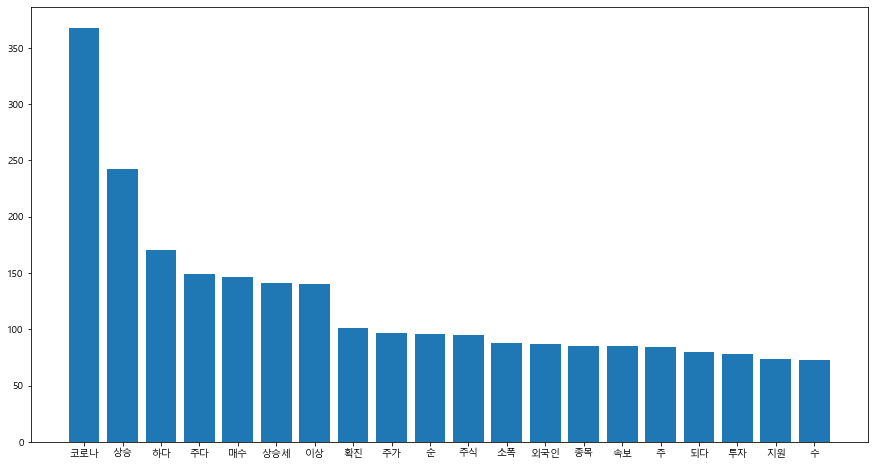

In [108]:
# 앞에서 20개까지만 출력
sorted_keys = sorted(wordInfo, key = wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)
%matplotlib inline
plt.figure(figsize=(15,8))
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

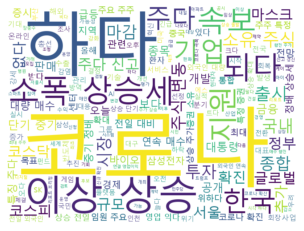

In [109]:
cloud = WordCloud(font_path = font_path, width = 800, height = 600, background_color = 'white').generate(morphed_data)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

###### - 그 다음, content에서 가장 많이 등장하는 단어

In [110]:
fake_content = fake['content'].drop_duplicates().values
print(len(fake_content))
fake_content

5794


array(['"실적기반" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개',
       '하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시',
       '온라인결제 관련주가 코로나19 사태의 최대 수혜주라는 평가가 나왔다. 언택트 소비 증가로 온라인 쇼핑 시장이 성장하고 있으며 이에 따른 수혜를 직접 누리고 있기 때문이다. 코로나19로 급증한 온라인 소비 트렌드는 편리함의 경험과 습관화된 행동으로 인해 코로나19가 종식된 이후에도 지속될 가능성이 높은 만큼, 관련주에서 아이디어를 얻는 것이 유효할 것으로 보인다.',
       ...,
       '코로나19 사태가 미국과 유럽으로 무섭게 확산하고 있는 가운데 지금까지 경험한 충격보다 훨씬 강하고 심각한 2차 경제쇼크가 몰아칠 것이란 우려가 커지고 있다. 이미 항공여행숙박유통 등 국내 업체들이 심각한 타격을 받고 있는 가운데 글로벌 경제의 심장부인 미국과 유럽의 경제활동 마비로 인한 글로벌 수요 감소 및 공급망 붕괴 등 파장이 불가피하기 때문이다. 관련기사 56892122면',
       '메디톡스는 보톨리눔 톡신 제제 메디톡신주의 제조판매사용을 잠정 중지한 식품의약품안전처의 명령을 취소해 달라며 행정소송을 제기했다. 메디톡스는 해당 제품의 안전성과 유효성에는 어떤 문제도 없다며 대전지방법원에 집행정지 신청 및 명령 취소 소송을 제기했다고 20일 밝혔다. 관련기사 4면',
       'http://battle.tomato.co.kr/)에서 확인 가능하다.'], dtype=object)

In [111]:
# 형태소 분석된 문장 샘플 보기. eomi=True 옵션 사용 (eomi=True를 추가하지 않으면, 보-, 어리- 형태로 나오므로 해석이 안되기 때문)
sample_data = rhinoMorph.onlyMorph_list(rn, fake_content[0], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('sample data: ',sample_data)   # 형태소 분석 결과
print('joined sample data: ', ' '.join(sample_data))    # 문자열을 공백(띄어쓰기)으로 연결한다

sample data:  ['실적', '기반', '저가', '매집', '급등', '유망주', '전격', '공개']
joined sample data:  실적 기반 저가 매집 급등 유망주 전격 공개


In [112]:
morphed_data = ''
for each in fake_content:
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, each, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    joined_data_each = ' '.join(morphed_data_each)     # 문자열을 하나로 연결
    if joined_data_each:                               # 내용이 있는 경우만 저장
        morphed_data += joined_data_each + " "

In [113]:
morphed_data[:100]

'실적 기반 저가 매집 급등 유망주 전격 공개 하이스 탁 선취 수수료 없다 월 최저 금리 상품 출시 온라인 결제 관련 주 코로나 사태 최대 수혜 주 평가 나오다 언 택 트다 소비 증'

In [114]:
from collections import Counter

print('morphed_data의 일부:', morphed_data[:200])

mergedTextList = morphed_data.split(' ')   # 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만듦
print('\nmergedTextList의 일부:', mergedTextList[:20])

wordInfo = Counter(mergedTextList)    # 하나의 리스트로 묶인 분리된 요소들을 카운트 (내림차순)
print('\nwordInfo:', wordInfo)        # 그냥 wordInfo라고 할 땐 내림차순 안되지만, print(wordInfo)로 하면 내림차순이 됨

morphed_data의 일부: 실적 기반 저가 매집 급등 유망주 전격 공개 하이스 탁 선취 수수료 없다 월 최저 금리 상품 출시 온라인 결제 관련 주 코로나 사태 최대 수혜 주 평가 나오다 언 택 트다 소비 증가 온라인 쇼핑 시장 성장 있다 이에 따르다 수혜 직접 누리다 있다 코로나 급증 하다 온라인 소비 트렌드 편리 함의 경험 습관화 되다 행동 인하다 코로나 가 종식 되다 이후 지속 

mergedTextList의 일부: ['실적', '기반', '저가', '매집', '급등', '유망주', '전격', '공개', '하이스', '탁', '선취', '수수료', '없다', '월', '최저', '금리', '상품', '출시', '온라인', '결제']

wordInfo: Counter({'종목': 705, '코로나': 662, '하다': 570, '관련': 401, '바로': 351, '주': 338, '되다': 295, '테마': 251, '한국': 240, '가다': 222, '무료': 220, '수익': 220, '및': 215, '확인': 212, '주다': 209, '있다': 207, '매수': 202, '주식': 190, '급등': 188, '신청': 185, '마감': 175, '리스트': 169, '확진': 168, '투자': 167, '개요': 164, '받다': 161, '공개': 154, '오다': 144, '기관': 143, '지금': 142, '코스피': 142, '위': 141, '적중': 139, '상승': 138, '코스닥': 137, '시장': 133, '상': 131, '개인': 131, '외국인': 126, '없다': 125, '전': 123, '주가': 122, '젠': 121, '후': 114, '바이오': 112, '매도': 109, '오늘': 104, '정부': 104, '트다': 103, '기업': 102, '순': 102, '미국': 100, '치료제': 96, '투자자': 94, '보다': 94, '전문가': 94, '제약'

In [115]:
len(wordInfo)

8749

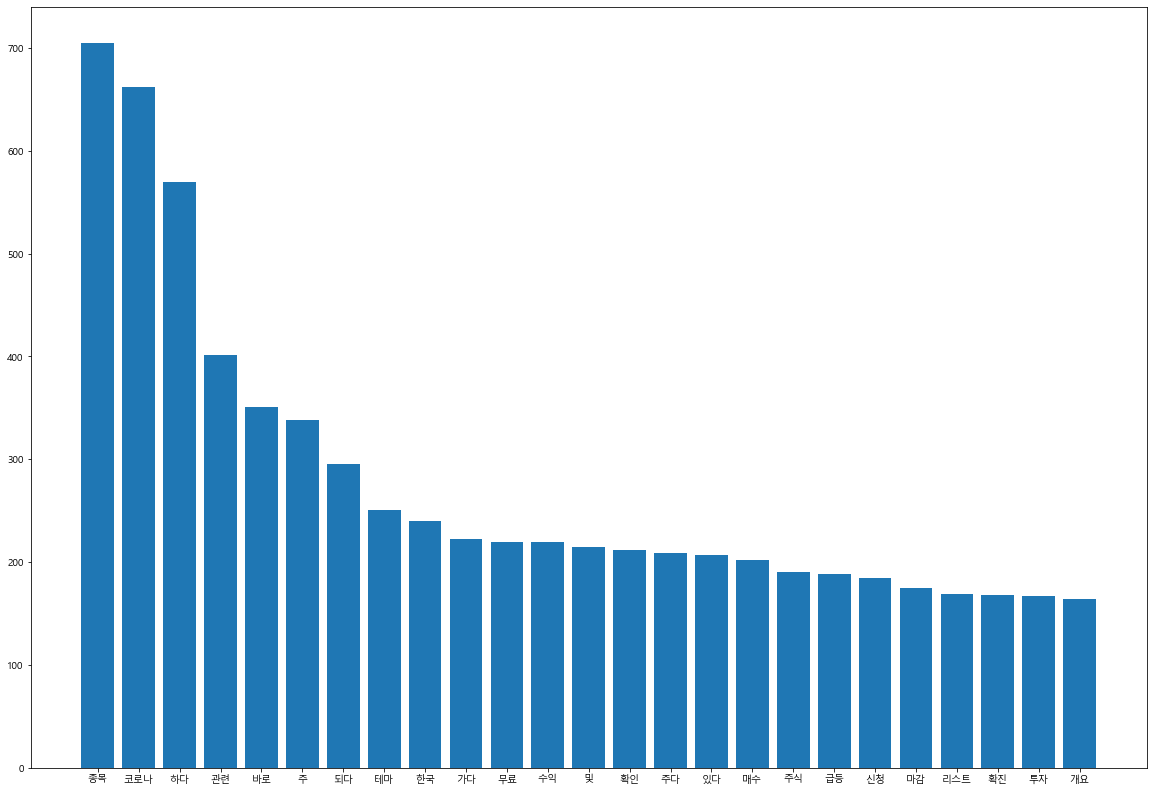

In [116]:
# 25개만 출력
sorted_keys = sorted(wordInfo, key = wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)
%matplotlib inline
plt.figure(figsize=(20,14))
plt.bar(range(25), sorted_values[:25])
plt.xticks(range(25), sorted_keys[:25])
plt.show()

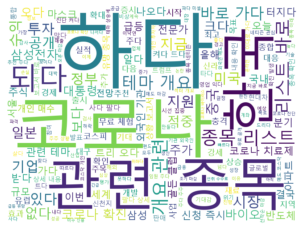

In [117]:
cloud = WordCloud(font_path = font_path, width = 800, height = 600, background_color = 'white').generate(morphed_data)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### <가짜 정보 "위치">

2. 진짜 뉴스와 가짜 정보만 따로 나눠서 <strong>"ord"</strong>의 분포를 살펴보자.

In [85]:
real_ord = real['ord'].values
fake_ord = fake['ord'].values
real_ord_data = Counter(real_ord)
fake_ord_data = Counter(fake_ord)
real_ord_data.elements

<bound method Counter.elements of Counter({1: 3553, 2: 3199, 3: 3161, 4: 3138, 5: 2994, 6: 2778, 7: 2575, 8: 2386, 9: 2179, 10: 2046, 11: 1860, 12: 1731, 13: 1613, 14: 1474, 15: 1363, 16: 1318, 17: 1186, 18: 1079, 19: 935, 20: 853, 21: 810, 22: 780, 23: 705, 24: 676, 25: 616, 26: 584, 27: 533, 28: 508, 29: 478, 30: 455, 31: 408, 32: 398, 41: 381, 42: 381, 39: 371, 33: 369, 43: 368, 37: 367, 34: 366, 40: 366, 35: 362, 38: 360, 44: 360, 45: 357, 36: 355, 46: 351, 48: 336, 47: 333, 49: 330, 50: 318, 52: 317, 51: 315, 53: 306, 54: 301, 55: 293, 56: 292, 57: 283, 58: 281, 59: 271, 60: 271, 61: 265, 66: 263, 62: 261, 65: 261, 64: 259, 63: 258, 68: 255, 67: 254, 69: 251, 70: 251, 71: 247, 72: 246, 74: 241, 73: 240, 75: 234, 76: 234, 78: 230, 77: 229, 79: 215, 80: 215, 81: 215, 82: 215, 83: 199, 84: 199, 85: 194, 86: 194, 87: 183, 88: 183, 89: 175, 90: 175, 91: 167, 92: 167, 93: 166, 94: 165, 96: 153, 95: 152, 97: 145, 98: 145, 99: 137, 100: 137, 101: 133, 102: 133, 103: 120, 104: 120, 105: 11

In [83]:
fake_ord_data.elements

<bound method Counter.elements of Counter({10: 1159, 11: 1156, 9: 1144, 12: 1128, 13: 1104, 14: 1076, 15: 1058, 8: 991, 16: 949, 17: 871, 7: 860, 19: 834, 18: 821, 20: 775, 6: 725, 21: 718, 22: 649, 23: 637, 24: 575, 5: 566, 25: 564, 26: 538, 27: 529, 31: 509, 28: 500, 32: 498, 33: 494, 29: 493, 3: 482, 30: 482, 34: 479, 4: 473, 35: 456, 2: 454, 36: 444, 37: 416, 38: 415, 39: 395, 40: 388, 41: 360, 47: 357, 43: 356, 42: 354, 44: 354, 48: 348, 51: 345, 46: 344, 50: 344, 45: 343, 49: 340, 52: 340, 55: 332, 56: 330, 53: 330, 59: 329, 60: 329, 54: 328, 63: 325, 61: 324, 62: 322, 64: 322, 57: 321, 58: 320, 67: 303, 68: 301, 65: 300, 66: 297, 71: 275, 72: 275, 69: 274, 70: 273, 75: 238, 76: 237, 73: 233, 74: 232, 79: 216, 80: 216, 77: 203, 78: 201, 83: 183, 84: 183, 81: 167, 82: 167, 87: 164, 88: 164, 85: 153, 86: 153, 91: 153, 92: 153, 89: 145, 95: 145, 90: 145, 96: 144, 99: 136, 100: 136, 1: 135, 93: 132, 94: 132, 97: 128, 98: 128, 103: 125, 104: 125, 107: 116, 108: 116, 101: 112, 102: 112

In [123]:
real['ord'].describe()

count    71813.000000
mean        34.598736
std         45.827948
min          1.000000
25%          6.000000
50%         15.000000
75%         48.000000
max        374.000000
Name: ord, dtype: float64

In [124]:
fake['ord'].describe()

count    46932.000000
mean        46.052416
std         43.153748
min          1.000000
25%         15.000000
50%         33.000000
75%         65.000000
max        396.000000
Name: ord, dtype: float64

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


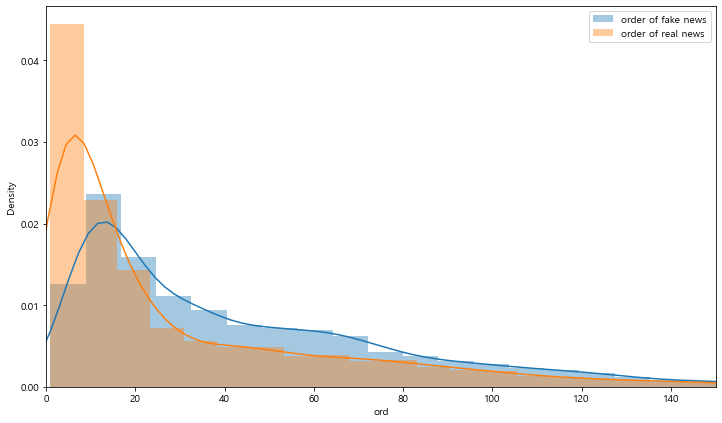

In [126]:
plt.figure(figsize=(12, 7))
sns.distplot(fake['ord'], label="order of fake news")
sns.distplot(real['ord'], label="order of real news")
plt.xlim(0, 150)
plt.legend()

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


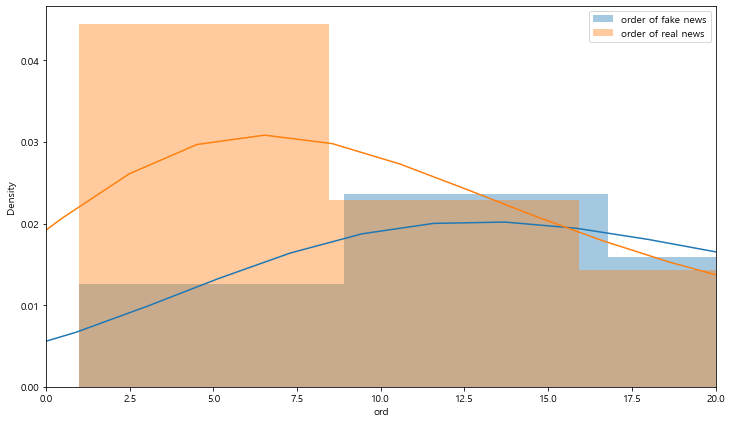

In [128]:
plt.figure(figsize=(12, 7))
sns.distplot(fake['ord'], label="order of fake news")
sns.distplot(real['ord'], label="order of real news")
plt.xlim(0, 20)
plt.legend()